## Directed graph (Flow Graph) example
### in Python, using NetworkX, Pandas and Matplotlib
* Author: André Maciel
* Date: 2019-07-26

In [62]:
import pandas as pd
import numpy as np
import networkx as nx

### Dataset:
In a recently research I found great **dataset** containing lat/long.

You can find the dataset in this link below:
- [Kelvins Repo](https://github.com/kelvins/Municipios-Brasileiros)

I've converted csv in xlsx file and moved to root notebook folder.

In [74]:
# I found this dataset in Kelvins's repo
municipios = pd.read_excel('municipios.xlsx')
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-167573.0,-494412.0,0,52
1,3100104,Abadia dos Dourados,-184831.0,-473916.0,0,31
2,5200100,Abadiânia,-16197.0,-487057.0,0,52
3,3100203,Abaeté,-191551.0,-454444.0,0,31
4,1500107,Abaetetuba,-172183.0,-488788.0,0,15


In [75]:
municipios.shape

(5570, 6)

In [80]:
# filter just state minas gerais, cod = 31
municipios_mg = municipios[municipios.codigo_uf == 31].reset_index(drop=True)
municipios_mg.head(5)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,3100104,Abadia dos Dourados,-184831.0,-473916.0,0,31
1,3100203,Abaeté,-191551.0,-454444.0,0,31
2,3100302,Abre Campo,-202996.0,-424743.0,0,31
3,3100401,Acaiaca,-20359.0,-431439.0,0,31
4,3100500,Açucena,-190671.0,-425419.0,0,31


In [82]:
# here is my nodes/edges inputs to build the Graph
nodes = municipios_mg

# now I get the range of nodes, I will use to create a random flow between this nodes below
nodes_count = nodes.shape[0]
nodes.head(5)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,3100104,Abadia dos Dourados,-184831.0,-473916.0,0,31
1,3100203,Abaeté,-191551.0,-454444.0,0,31
2,3100302,Abre Campo,-202996.0,-424743.0,0,31
3,3100401,Acaiaca,-20359.0,-431439.0,0,31
4,3100500,Açucena,-190671.0,-425419.0,0,31


In [93]:
# Random edges(source -> target), base to create a directed graph
# mind the size, I'm using just 15 rows/flows, to plot the graph below (matplotlib)
# but in real situation this shape should be expressive bigger
edges = pd.DataFrame(np.random.randint(0, nodes_count, size=(15, 2)), columns=['Source','Target'])
edges.head(5)

,Source,Target
0,156,139
1,739,620
2,805,146
3,22,163
4,829,63


In [85]:
# get SourceName
edges = edges.merge(nodes.nome
           , how='left'
           , left_on='Source'
           , right_on=nodes.index)
edges = edges.rename(index=str, columns={'nome':'SourceName'})

# get TargetName
edges = edges.merge(nodes.nome
           , how='left'
           , left_on='Target'
           , right_on=nodes.index)
edges = edges.rename(index=str, columns={'nome':'TargetName'})

edges.head()

,Source,Target,SourceName,TargetName
0,652,434,Rochedo de Minas,Lassance
1,158,641,Carneirinho,Rio Doce
2,77,136,Bocaiúva,Capim Branco
3,168,667,Catuji,Santa Cruz de Minas
4,541,244,Padre Carvalho,Divino


In [94]:
# Create graph from pandas DataFrame
G = nx.convert_matrix.from_pandas_edgelist(edges
                                       , source='Source'
                                       , target='Target'
                                       , create_using=nx.DiGraph)

In [95]:
# Here is use a list of compreension to get just roots
roots = (v for v, d in G.in_degree() if d == 0)

# Here is use a list of compreension to get just leaves
leaves = (v for v, d in G.out_degree() if d == 0)

### This script below is not working properly yet, I'm reading oficial documentation of [all_simple_paths](https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.simple_paths.all_simple_paths.html).

In [96]:
all_paths = []
for root in roots:
    for leaf in leaves:
        paths = nx.all_simple_paths(G, root, leaf)
        all_paths.extend(paths)

all_paths

[[156, 139]]

In [97]:
import matplotlib.pyplot as plt

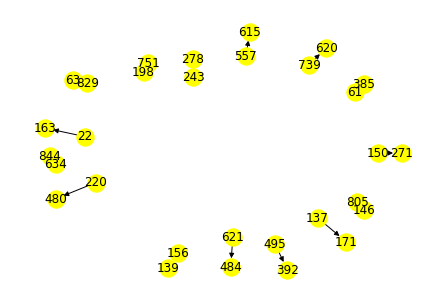

In [98]:
a = nx.draw(G, arrows=True, with_labels=True, node_color='yellow')
plt.draw()

In [91]:
nx.draw_networkx_nodes?

Signature:
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=None,
    node_size=300,
    node_color='#1f78b4',
    node_shape='o',
    alpha=1.0,
    cmap=None,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=None,
    edgecolors=None,
    label=None,
    **kwds,
)
Docstring:
Draw the nodes of the graph G.

This draws only the nodes of the graph G.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary
   A dictionary with nodes as keys and positions as values.
   Positions should be sequences of length 2.

ax : Matplotlib Axes object, optional
   Draw the graph in the specified Matplotlib axes.

nodelist : list, optional
   Draw only specified nodes (default G.nodes())

node_size : scalar or array
   Size of nodes (default=300).  If an array is specified it must be the
   same length as nodelist.

node_color : color string, or array of floats
   Node color. Can be a single color format string (default='#1f78b4'),
   or a  sequence of colors with the same 